## Problem Statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

## Bussiness Goal
Model the price of houses with the available independent variables. Management wants to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

Note: Install category enconder in case of not exist on system
Used for binary encoding with high cardinality values.

In [1]:
#pip install category_encoders

In [2]:
# Import Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn import metrics
#Statistics
from scipy import stats
from scipy.stats import norm, skew 

pd.set_option('display.max_rows', 500)

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# import category_encoders as ce

## Reading the Data and Understanding its structure.

In [3]:
# Read data from csv
data = pd.read_csv("train.csv")
data.shape

(1460, 81)

In [4]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Data cleaning

In [6]:
#Checking columns with null values
data.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
LotConfig           0
OverallCond         0
OverallQual         0
HouseStyle          0
BldgType            0
Condition2          0
BsmtFinSF1          0
MSZoning            0
LotArea             0
Street              0
Condition1          0
Neighborhood        0
LotShape            0
LandContour         0
LandSlope           0
SalePrice 

### Dropping columns with large number of missing values.

In [7]:
data = data.drop(columns=['PoolQC','Fence','Alley','MiscFeature'])

In [8]:
# for the LotFrontage column and GarageYrBlt we will impute the missing values with the median since the feature contains outliers
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].median())

data['GarageYrBlt'] = data['GarageYrBlt'].fillna(data['GarageYrBlt'].median())

# for the "below columns" we will impute the null values with 'mode'
for col in ('GarageCond', 'GarageType', 'GarageFinish','GarageQual'):
    
    data[col] = data[col].fillna(data[col].mode()[0])
    
# for the "Bsmt" columns we will impute the null values with 'mode'
for col in ('BsmtExposure', 'BsmtFinType2', 'BsmtFinType1','BsmtCond','BsmtQual'):
    
    data[col] = data[col].fillna(data[col].mode()[0])
    
# for the columns we will impute the null values with 'mode'

for col in ('MasVnrArea', 'MasVnrType', 'Electrical'):
    
    data[col] = data[col].fillna(data[col].mode()[0])

In [9]:
# Checking for duplicates and dropping the entire duplicate row if any
data.drop_duplicates(subset=None, inplace=True)
print(data.shape)

(1460, 77)


In [10]:
#Replacing Nan values of FireplaceQu with NA i.e. No Fireplace 
data.FireplaceQu = data.FireplaceQu.fillna('NA')

In [11]:
#Categorical columns
data.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'], dtype='object')

In [12]:
data.select_dtypes(exclude='object').columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'], dtype='object')

In [13]:
null = pd.DataFrame(round(data.isnull().sum()/len(data.index)*100,2).sort_values(ascending=False),columns=["Null %"])
null.index.name = 'Features'
null_df = null[null["Null %"] > 0]
null_df

,Null %
Features,


In [14]:
print(data['PoolArea'].value_counts())
print(data['MiscVal'].value_counts())
print(data['3SsnPorch'].value_counts())

0      1453
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64
0        1408
400        11
500         8
700         5
450         4
2000        4
600         4
1200        2
480         2
1150        1
800         1
15500       1
620         1
3500        1
560         1
2500        1
1300        1
1400        1
350         1
8300        1
54          1
Name: MiscVal, dtype: int64
0      1436
168       3
216       2
144       2
180       2
245       1
238       1
290       1
196       1
182       1
407       1
304       1
162       1
153       1
320       1
140       1
130       1
96        1
23        1
508       1
Name: 3SsnPorch, dtype: int64


In [15]:
#Dropping the following columns as it dominated by one value and add
data = data.drop(['PoolArea','MiscVal','3SsnPorch'],axis=1)
data.shape

(1460, 74)

In [16]:
data.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea 

In [17]:
#Final check of missing values 
Total_missing = data.isnull().sum().sort_values(ascending = False)
Total_missing_Perc = (100*data.isnull().sum()/data.shape[0]).sort_values(ascending = False)
df_missing_values = pd.concat([Total_missing,Total_missing_Perc], axis=1, keys=['Total_missing_values', 'Percent_missing_values'])
df_missing_values

,Total_missing_values,Percent_missing_values
SalePrice,0,0.0
YearBuilt,0,0.0
RoofStyle,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0
MasVnrType,0,0.0
MasVnrArea,0,0.0
ExterQual,0,0.0
ExterCond,0,0.0


###### There are four columns gives details on year of construction. New derived column Age of building is made and dropped the other columns. 

In [18]:
data['Age']=data['YrSold']-data['YearRemodAdd']
data['Age'].head()

0     5
1    31
2     6
3    36
4     8
Name: Age, dtype: int64

In [19]:
data_cleaned =data.drop(['YrSold', 'MoSold','YearBuilt','YearRemodAdd','Id'], axis = 1)

### Manual recoding of necessary categoricalvariables

In [20]:
#Converting MSSubClass variable to categorical as per its properties.
data_cleaned['MSSubClass']=data_cleaned['MSSubClass'].astype('object')

In [21]:
#convert ExterQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
data_cleaned = data_cleaned.replace({'ExterQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})
#convert BsmtQual 0,1,2,3,4,5 -> NA, Po, Fa, TA, Gd, Ex
data_cleaned = data_cleaned.replace({'BsmtQual':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})
#convert BsmtExposure 0,1,2,3,4 -> NA, No, Mn, Av, gd
data_cleaned = data_cleaned.replace({'BsmtExposure':{'NA':0, 'No':1,'Mn':2, 'Av':3, 'Gd':4}})
#convert BsmtFinType1 0,1,2,3,4,5,6 -> NA, Unf, LwQ, Rec, BLQ, ALQ, GLQ
data_cleaned = data_cleaned.replace({'BsmtFinType1':{'NA':0,'Unf':1,'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}})
#convert HeatingQC 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
data_cleaned = data_cleaned.replace({'HeatingQC':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})
#convert KitchenQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
data_cleaned = data_cleaned.replace({'KitchenQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})
#convert FireplaceQu 0,1,2,3,4,5 -> NA, Po, Fa, TA, Gd, Ex
data_cleaned = data_cleaned.replace({'FireplaceQu':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

## Exploratory data analysis & data visualization.

#### Univariate Analysis of Numerical Columns

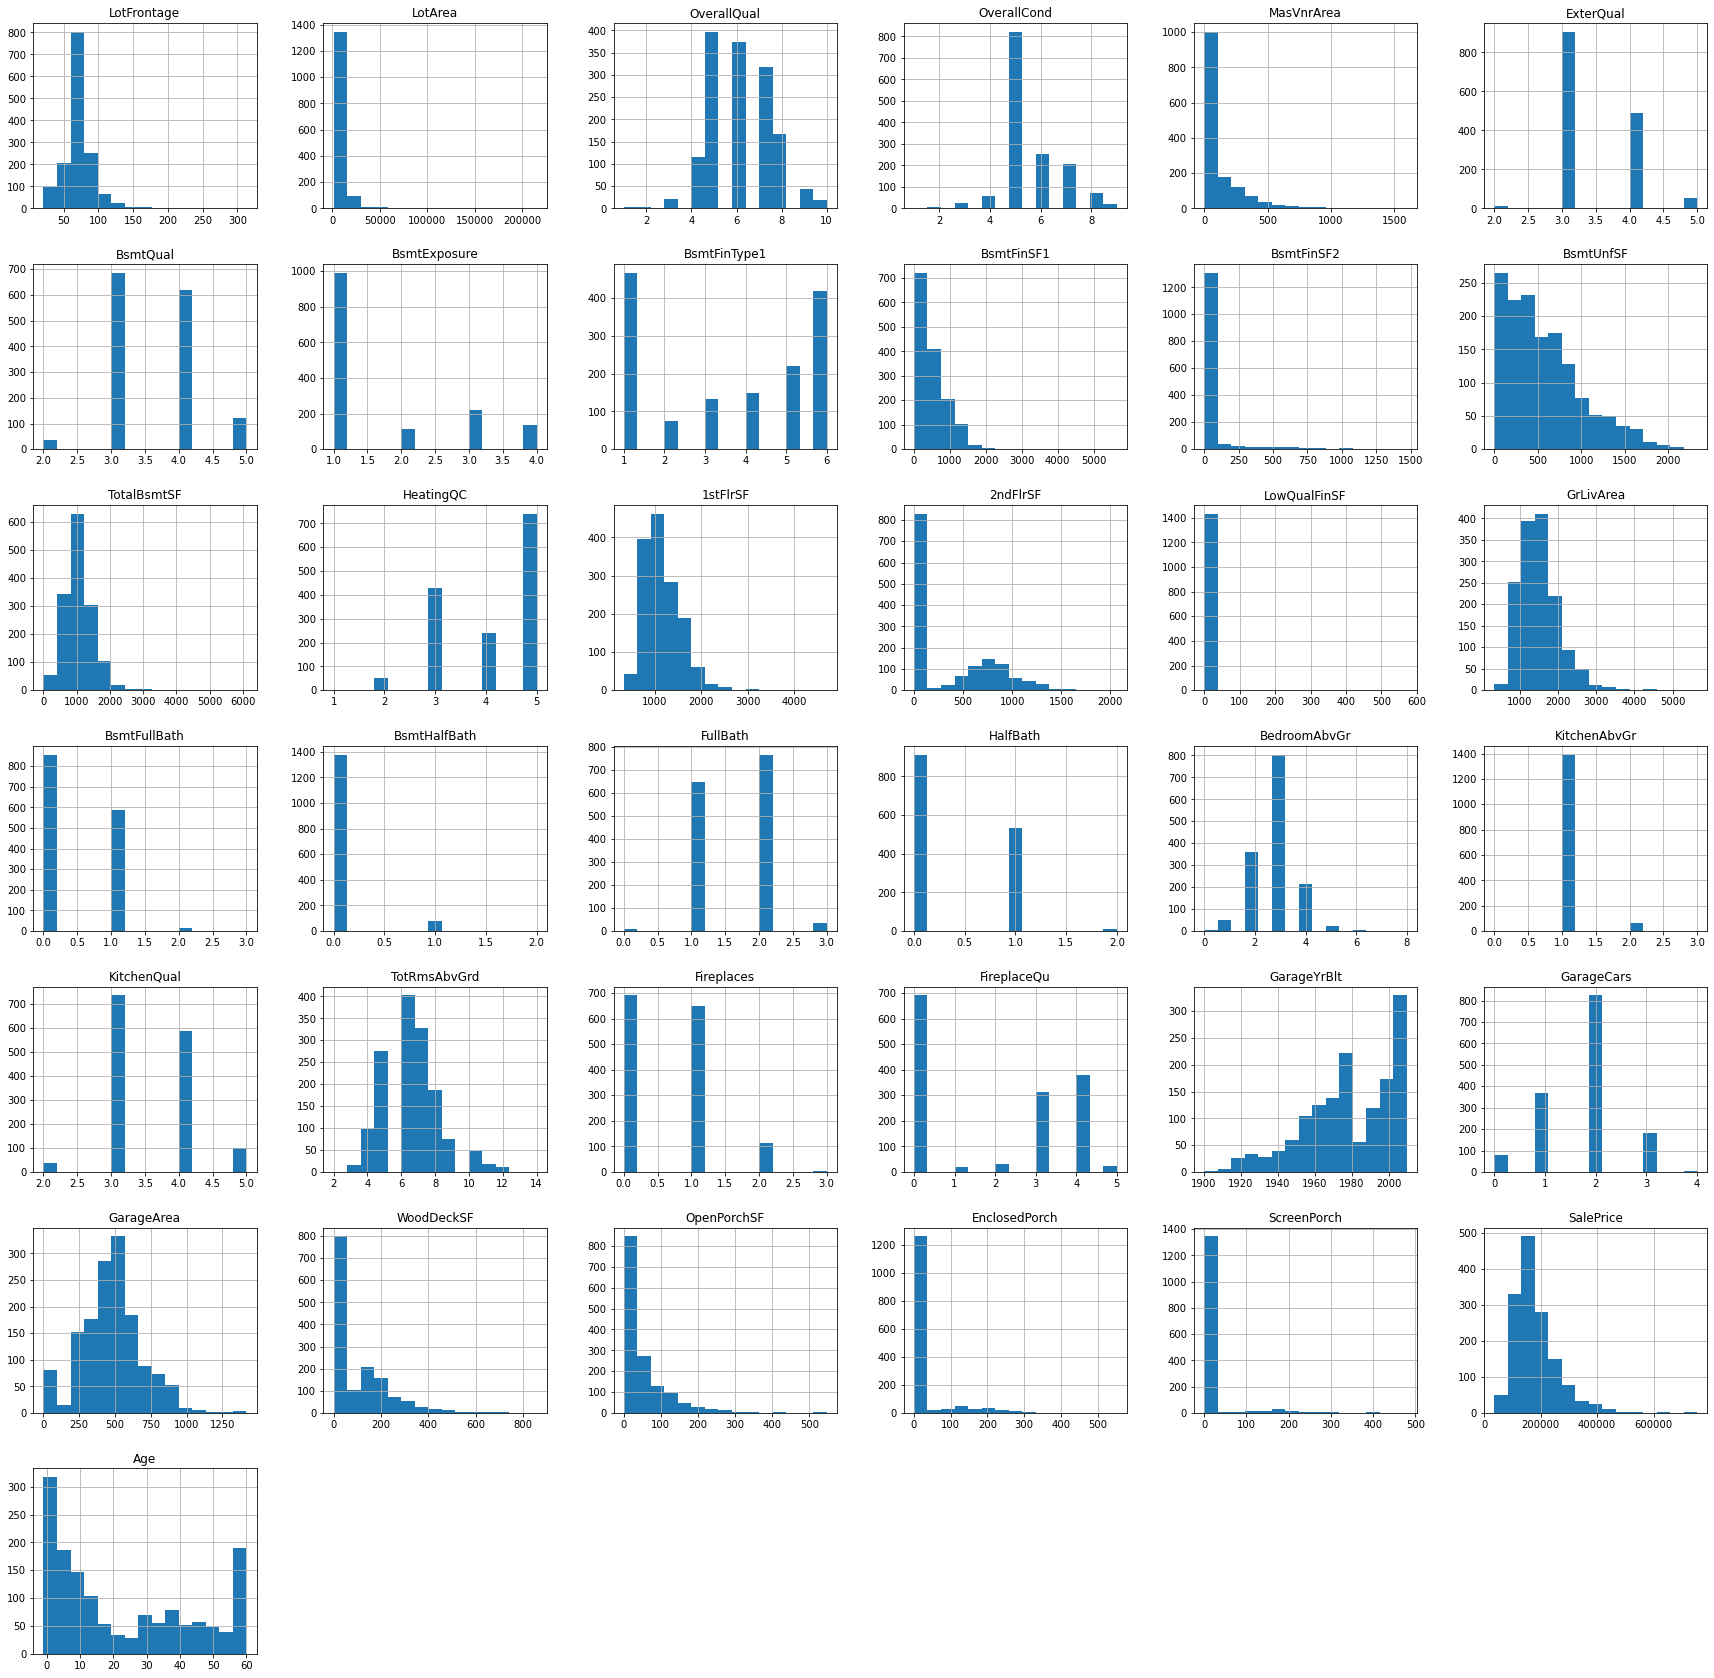

In [22]:
numeric_columns = data_cleaned.dtypes[data_cleaned.dtypes != "object"].index
data_cleaned[numeric_columns].hist(bins=15, figsize=(30, 30))
plt.show()

###### Some  variables are highly skewed and may be correlated with each other, difficult to interpret from univairate analysis.

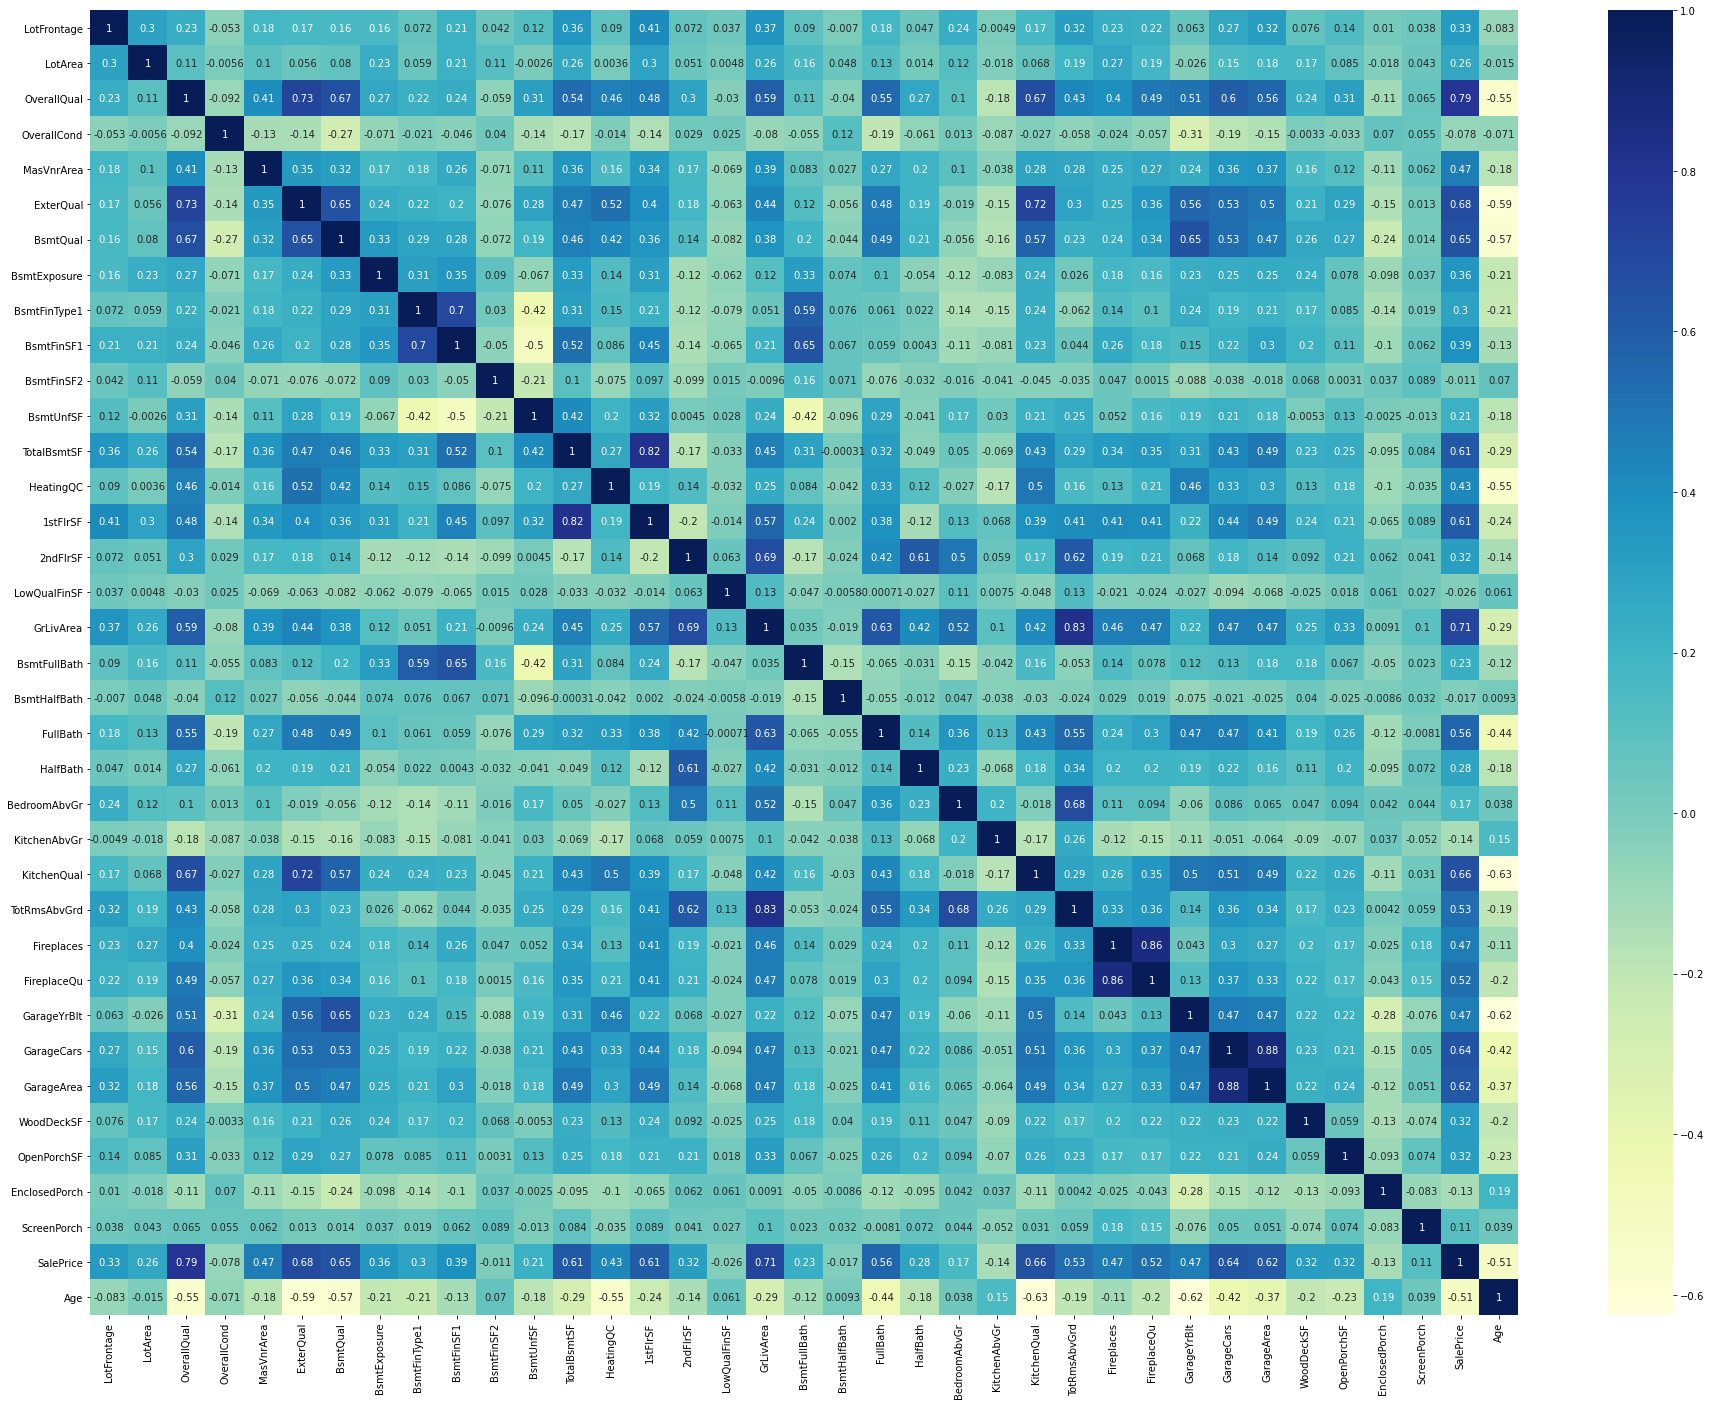

In [23]:
cor = data_cleaned.corr()
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(32,24))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

###### Based on above heatmap we can make following statements.
###### SalePrice is very high positively correlated to the OverallQual(0.79),1stFlrSF (0.61),TotalBsmtSF (0.61),GrLivArea (0.71),FullBath(0.58),TotRmsAbvGrd(0.55),GarageCars(0.64),GarageArea(0.62) and negatively correlated to the Age(-0.5).

<Figure size 2304x2304 with 0 Axes>

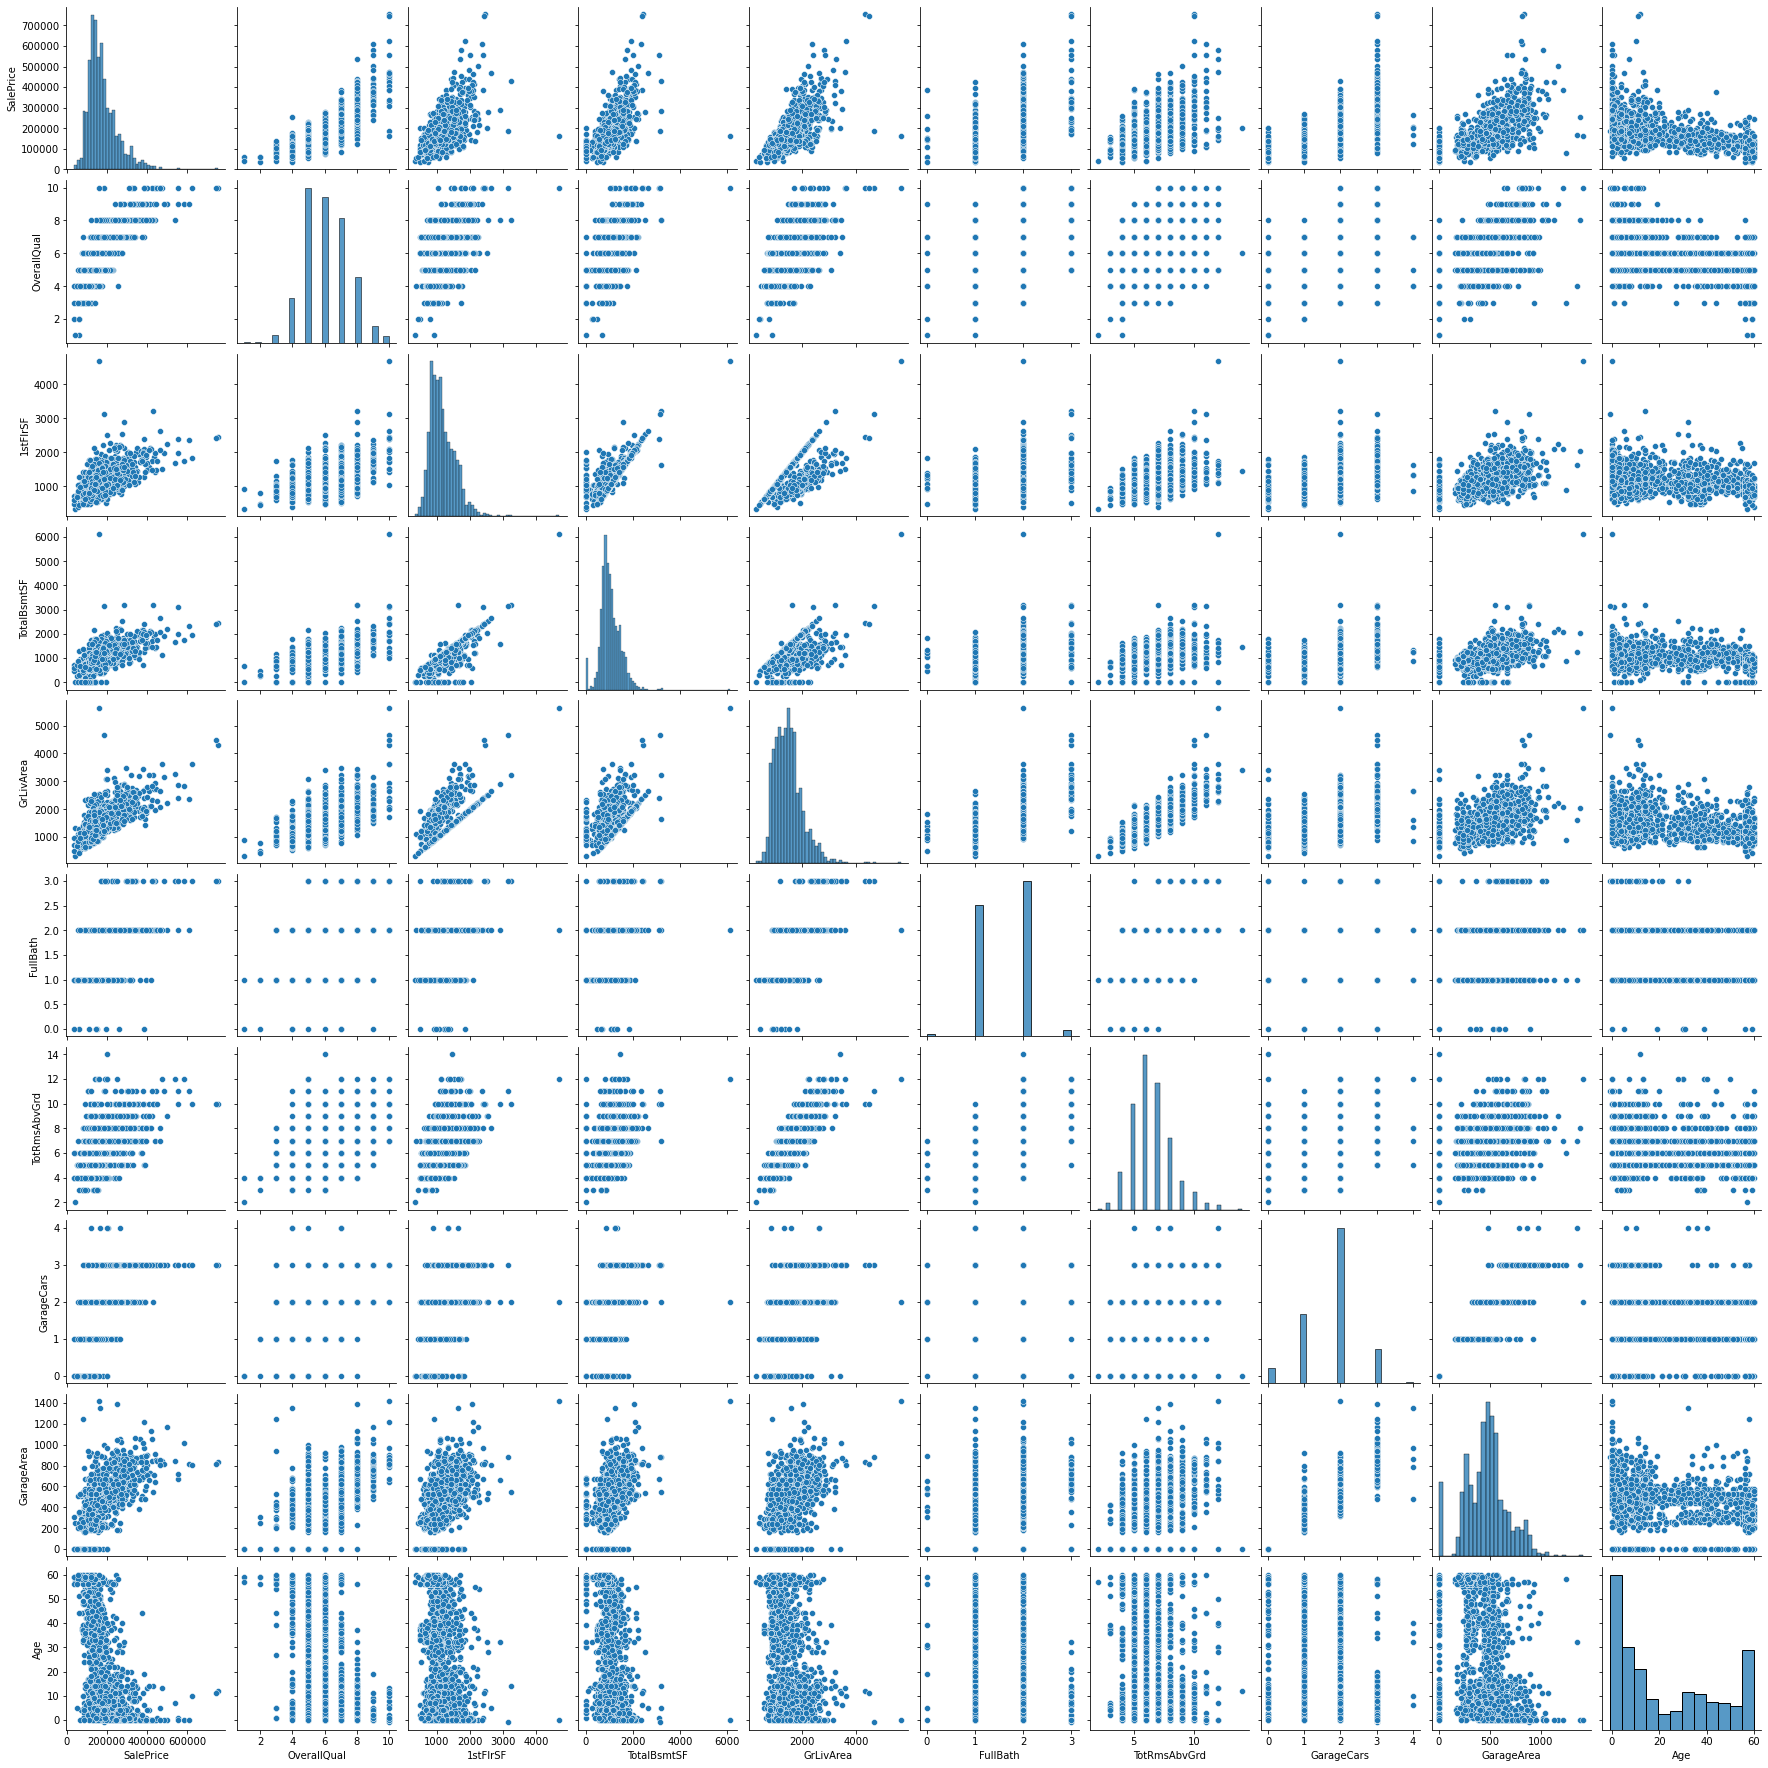

In [24]:
plt.figure(figsize=(32,32))
sns.pairplot(data_cleaned, vars=['SalePrice','OverallQual','1stFlrSF','TotalBsmtSF',
                                 "GrLivArea","FullBath",'TotRmsAbvGrd','GarageCars','GarageArea','Age'])
plt.show()

##### Most of the variables are linearly correlated to SalePrice so regression model is viable.
FullBath, GarageCars are not continuously distributed so we can encode them according to theie characteritics.

In [25]:
### Categorical Variables

In [26]:
cat_columns  = data_cleaned.dtypes[data_cleaned.dtypes == "object"].index
cat_columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterCond', 'Foundation', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'], dtype='object')

### EDA is done for few Categorical variable whic may useful in predicting Sale Price.

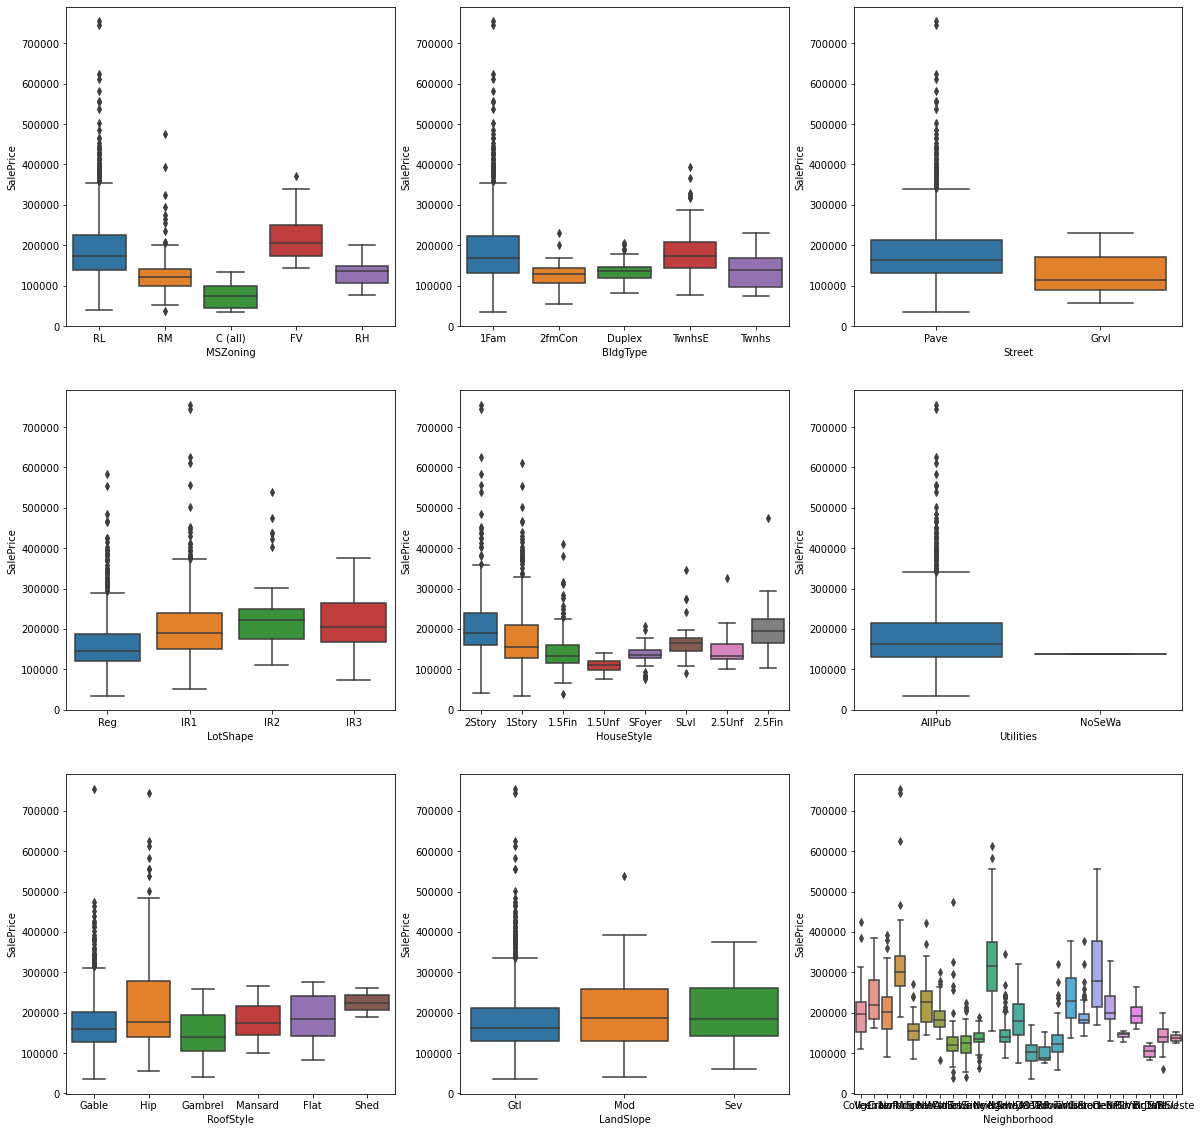

In [27]:
plt.figure(figsize = (20,20)) 
plt.subplot(3,3,1)
sns.boxplot(x='MSZoning', y="SalePrice", data=data_cleaned)
plt.subplot(3,3,2)
sns.boxplot(x='BldgType', y="SalePrice", data=data_cleaned)
plt.subplot(3,3,3)
sns.boxplot(x='Street', y="SalePrice", data=data_cleaned)
plt.subplot(3,3,4)
sns.boxplot(x='LotShape', y="SalePrice", data=data_cleaned)
plt.subplot(3,3,5)
sns.boxplot(x='HouseStyle', y="SalePrice", data=data_cleaned)
plt.subplot(3,3,6)
sns.boxplot(x='Utilities', y="SalePrice", data=data_cleaned)
plt.subplot(3,3,7)
sns.boxplot(x='RoofStyle', y="SalePrice", data=data_cleaned)
plt.subplot(3,3,8)
sns.boxplot(x='LandSlope', y="SalePrice", data=data_cleaned)
plt.subplot(3,3,9)
sns.boxplot(x='Neighborhood', y="SalePrice", data=data_cleaned)
plt.show()

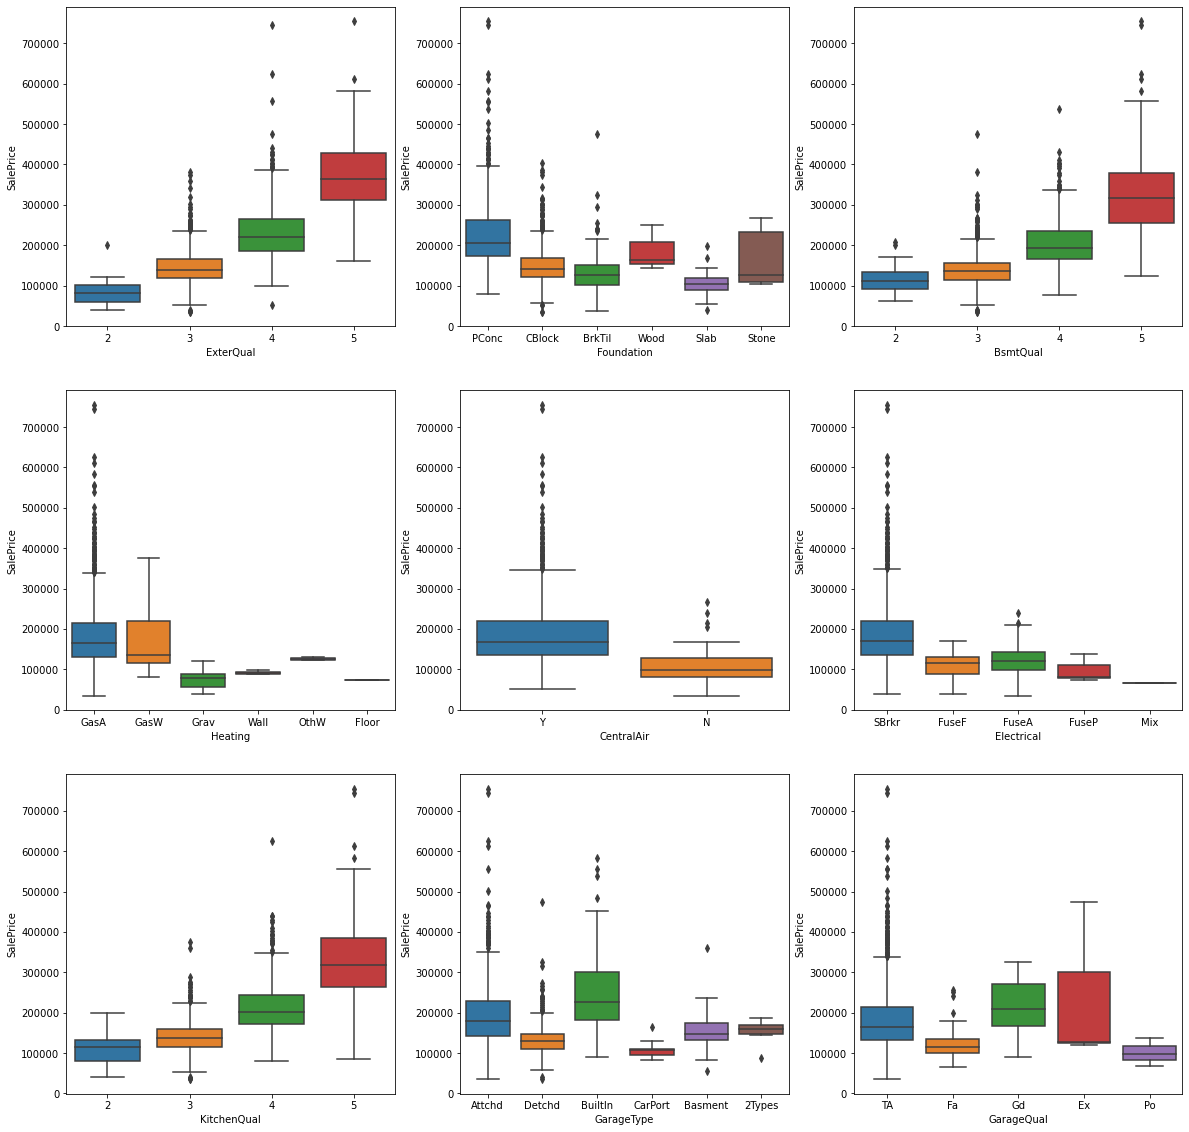

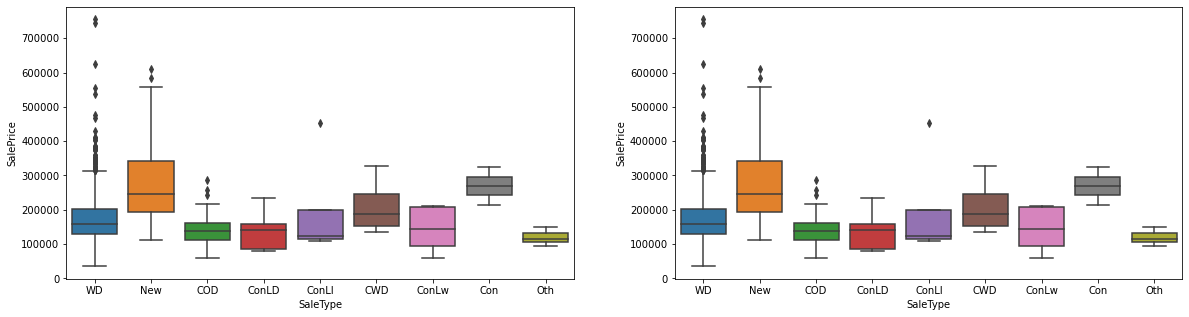

In [28]:
plt.figure(figsize = (20,20)) 
plt.subplot(3,3,1)
sns.boxplot(x='ExterQual', y="SalePrice", data=data_cleaned)
plt.subplot(3,3,2)
sns.boxplot(x='Foundation', y="SalePrice", data=data_cleaned)
plt.subplot(3,3,3)
sns.boxplot(x='BsmtQual', y="SalePrice", data=data_cleaned)
plt.subplot(3,3,4)
sns.boxplot(x='Heating', y="SalePrice", data=data_cleaned)
plt.subplot(3,3,5)
sns.boxplot(x='CentralAir', y="SalePrice", data=data_cleaned)
plt.subplot(3,3,6)
sns.boxplot(x='Electrical', y="SalePrice", data=data_cleaned)
plt.subplot(3,3,7)
sns.boxplot(x='KitchenQual', y="SalePrice", data=data_cleaned)
plt.subplot(3,3,8)
sns.boxplot(x='GarageType', y="SalePrice", data=data_cleaned)
plt.subplot(3,3,9)
sns.boxplot(x='GarageQual', y="SalePrice", data=data_cleaned)
plt.show()
plt.figure(figsize = (20,5)) 
plt.subplot(1,2,1)
sns.boxplot(x='SaleType', y="SalePrice", data=data_cleaned)
plt.subplot(1,2,2)
sns.boxplot(x='SaleType', y="SalePrice", data=data_cleaned)
plt.show()

Inferences -

MsZoning with of type 'Fv' has high Saleprice and type 'C' has least sale price
The Street of type 'Pave' has more Sale Price when compared to 'Grvl'
the utlities coulms have most of its values as 'AllPub' So we this column have give much of an informration. - ITs not an important feature.
The house with Exterior Quality of type Execellent has the highest SalePrice.
The house with Basement Quality of type Execellent has the highest SalePrice.
The house with Kitchen Quality of type Execellent has the highest SalePrice.
The house with Garage Quality of type Execellent has the highest SalePrice.
The house with Garage Type of type BuiltIn has the highest SalePrice.
The house with Sale Type of type New has the highest SalePrice.
The Central air of type 'Yes' has more Sale Price when compared to 'No'

### Data Preprocessing - Tranforming the Target variable

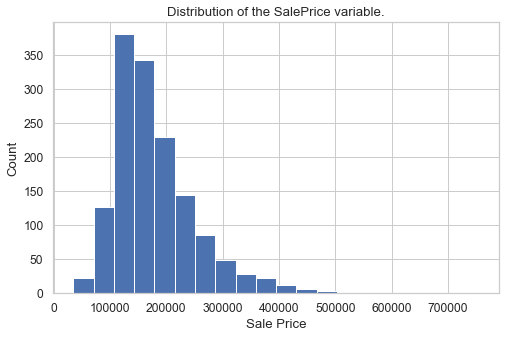

In [29]:
#Check the distribution the SalePrice
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(data_cleaned['SalePrice'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}).set(xlabel='Sale Price', ylabel='Count');
plt.title("Distribution of the SalePrice variable.")
plt.show()

#### The target variabe SalePrice is right skewed.To make it normally distributed we are using log tranformation method


 mu = 12.02 and sigma = 0.40



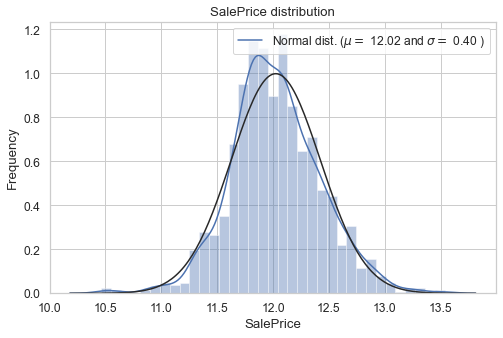

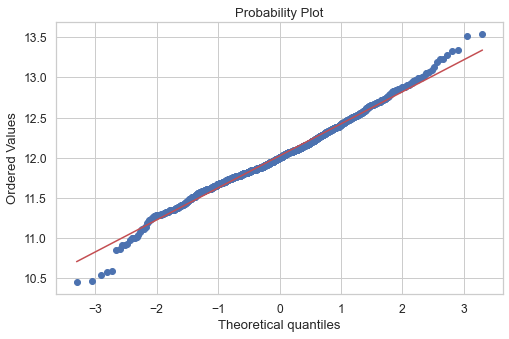

In [30]:
#Using numpy to do log transform.
from scipy.stats import norm
from scipy import stats
data_cleaned["SalePrice"] = np.log(data_cleaned["SalePrice"])

#Checking the new distribution 
sns.distplot(data_cleaned['SalePrice'] , fit=norm);

# Estimating the mu and sigma using the fit function
(mu, sigma) = norm.fit(data_cleaned['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Plotting the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Plotting the QQ-plot
fig = plt.figure()
res = stats.probplot(data_cleaned['SalePrice'], plot=plt)
plt.show()

In [31]:
# List of variables to map
def map_function(x):
    return x.map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'Na':0})
def map_function1(x):
    return x.map({'Gd':4,'Av':3,'Mn':2,'No':1,'Na':0})
def map_function2(x):
    return x.map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0})
def map_function3(x):
    return x.map({'Y':1,'N':0})
def map_function4(x):
    return x.map({'Typ':8,'Min1':7,'Min2':6,'Mod':5,'Maj1':4,'Maj2':3,'Sev':2,'Sal':1})
def map_function5(x):
    return x.map({'Fin':3,'RFn':2,'Unf':1,'NA':0,'Unknown':0})
def map_function6(x):
    return x.map({'Y':2,'P':2,'N':0})

In [32]:
data_cleaned['ExterQual'] = data_cleaned[['ExterQual']].apply(map_function)
data_cleaned['ExterCond'] = data_cleaned[['ExterCond']].apply(map_function)
data_cleaned['BsmtQual'] = data_cleaned[['BsmtQual']].apply(map_function)
data_cleaned['BsmtCond'] = data_cleaned[['BsmtCond']].apply(map_function)
data_cleaned['BsmtExposure'] = data_cleaned[['BsmtExposure']].apply(map_function1)
data_cleaned['BsmtFinType1'] = data_cleaned[['BsmtFinType1']].apply(map_function2)
data_cleaned['BsmtFinType2'] = data_cleaned[['BsmtFinType2']].apply(map_function2)
data_cleaned['HeatingQC'] = data_cleaned[['HeatingQC']].apply(map_function)
data_cleaned['CentralAir'] = data_cleaned[['CentralAir']].apply(map_function3)
data_cleaned['KitchenQual'] = data_cleaned[['KitchenQual']].apply(map_function)
data_cleaned['Functional'] = data_cleaned[['Functional']].apply(map_function4)
data_cleaned['GarageFinish'] = data_cleaned[['GarageFinish']].apply(map_function5)
data_cleaned['GarageQual'] = data_cleaned[['GarageQual']].apply(map_function)
data_cleaned['GarageCond'] = data_cleaned[['GarageCond']].apply(map_function)
data_cleaned['PavedDrive'] = data_cleaned[['PavedDrive']].apply(map_function6)

### Creation of Dummy Variables

In [33]:
dummy = pd.get_dummies(data_cleaned[['MSSubClass','MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical',
       'GarageType', 'SaleType', 'SaleCondition']], drop_first=True)
dummy.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0

### Adding dummy variables to original data form.

In [34]:
# Adding the results back to the cleaned dataframe
data_cleaned = pd.concat([data_cleaned, dummy], axis=1)
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Columns: 228 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(10), int64(36), object(24), uint8(158)
memory usage: 1.0+ MB


### Dropping the original variables.

In [35]:
data_cleaned=data_cleaned.drop(['MSSubClass','MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical',
       'GarageType', 'SaleType', 'SaleCondition','KitchenQual','ExterQual','BsmtQual','BsmtExposure','BsmtFinType1','HeatingQC'], axis = 1)

### Test train splitting of the dataset.

In [36]:
Total_missing = data_cleaned.isnull().sum().sort_values(ascending = False)
Total_missing_Perc = (100*data_cleaned.isnull().sum()/data_cleaned.shape[0]).sort_values(ascending = False)
df_missing_values = pd.concat([Total_missing,Total_missing_Perc], axis=1, keys=['Total_missing_values', 'Percent_missing_values'])
df_missing_values

,Total_missing_values,Percent_missing_values
SaleCondition_Partial,0,0.0
Neighborhood_BrDale,0,0.0
LandSlope_Sev,0,0.0
LandSlope_Mod,0,0.0
LotConfig_Inside,0,0.0
LotConfig_FR3,0,0.0
LotConfig_FR2,0,0.0
LotConfig_CulDSac,0,0.0
Utilities_NoSeWa,0,0.0
LandContour_Lvl,0,0.0


In [37]:
np.random.seed(0)
house_train,house_test = train_test_split(data_cleaned, train_size=0.7,random_state=100)
print(house_train.shape)
print(house_test.shape)

(1021, 198)
(439, 198)


In [38]:
y_train=house_train.pop('SalePrice')
X_train=house_train
y_test=house_test.pop('SalePrice')
X_test=house_test

### Scaling of the data set.

In [39]:
scaler=MinMaxScaler()
numeric_feats = X_train.dtypes[X_train.dtypes != "object"].index
X_train[numeric_feats]=scaler.fit_transform(X_train[numeric_feats])

In [40]:
X_test[numeric_feats]=scaler.transform(X_test[numeric_feats])

### Feature selection through RFE.

In [41]:
# Import RFE

from sklearn.feature_selection import RFE
lm = LinearRegression()   
rfe = RFE(lm, 90)
rfe.fit(X_train, y_train)  
print(rfe.support_)        #True or False   
print(rfe.ranking_)

[ True  True  True  True  True False False  True False  True  True  True
 False  True  True  True  True  True False  True  True False  True False
  True False False  True False  True  True  True False  True  True False
 False  True  True  True  True  True False False False  True False False
  True False  True False  True  True  True  True  True False False False
 False False False False False False False False False False  True  True
 False  True  True False  True False False False  True False False False
 False False  True False False False False  True  True False  True False
  True False False False False False False False False False  True  True
 False  True  True  True False False  True False  True  True False False
 False False False False False  True  True  True  True  True  True  True
  True  True  True  True  True  True False False False False  True False
 False False  True  True  True False  True  True False False False False
 False False False False False  True False False Fa

In [42]:
col = X_train.columns[rfe.support_]
col

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'Functional', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'GarageQual', 'PavedDrive', 'WoodDeckSF', 'ScreenPorch', 'Age', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_75', 'MSSubClass_90', 'MSSubClass_160', 'MSSubClass_190', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LandSlope_Sev', 'Neighborhood_Blueste', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'Condition1_Norm', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRNn', 'BldgType_2fmCon', 'BldgType_Duplex', 'HouseStyle_1.5Unf', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'RoofStyle_Shed', 'RoofMatl_CompShg',
       '

In [43]:
# Features which can be excluded to make the model according to RFE
X_train.columns[~rfe.support_]

Index(['ExterCond', 'BsmtCond', 'BsmtFinType2', 'CentralAir', 'BsmtHalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageFinish',
       ...
       'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 'SaleType_Con', 'SaleType_ConLw', 'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Family'], dtype='object', length=107)

In [44]:
# Creating an X_train dataframe to build the first model with features selected by RFE technique
X_train_rfe1 =X_train[col]

In [45]:
import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe1) #Adding Constant
X_train_rfe1.head()

,const,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenAbvGr,Functional,GarageYrBlt,GarageCars,GarageArea,GarageQual,PavedDrive,WoodDeckSF,ScreenPorch,Age,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_75,MSSubClass_90,MSSubClass_160,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_Crawfor,Neighborhood_MeadowV,Neighborhood_NridgHt,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Veenker,Condition1_Norm,Condition2_PosN,Condition2_RRAe,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,HouseStyle_1.5Unf,HouseStyle_2.5Fin,HouseStyle_2.5Unf,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_Stone,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_Wd Shng,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_OthW,Heating_Wall,SaleType_CWD,SaleType_ConLD,SaleType_ConLI,SaleType_New,SaleType_Oth,SaleCondition_Alloca,SaleCondition_Normal,SaleCondition_Partial
318,1.0,0.236301,0.039403,0.666667,0.500,0.16,0.174876,0.000000,0.154110,0.220458,0.231481,0.616949,0.0,0.424289,0.333333,0.666667,0.5,0.0,1.0,0.845455,0.75,0.462623,0.50,1.0,0.396733,0.0,0.278689,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
239,1.0,0.106164,0.033981,0.555556,0.375,0.00,0.016655,0.000000,0.274401,0.120295,0.098611,0.333656,0.0,0.201576,0.000000,0.333333,0.5,0.0,1.0,0.445455,0.25,0.155148,0.50,1.0,0.000000,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
986,1.0,0.130137,0.017931,0.555556,0.875,0.00,0.000000,0.000000,0.207620,0.079378,0.145602,0.307022,0.0,0.230015,0.000000,0.333333,0.0,0.0,1.0,0.454545,0.25,0.179831,0.25,1.0,0.459743,0.0,0.065574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1416,1.0,0.133562,0.046139,0.333333,0.625,0.00,0.000000,0.000000,0.332620,0.127169,0.202315,0.505569,0.0,0.355880,0.000000,0.666667,0.0,0.5,1.0,0.645455,0.50,0.394922,0.50,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
390,1.0,0.099315,0.032409,0.444444,0.875,0.00,0.042700,0.265265,0.098031,0.140917,0.136343,0.196610,0.0,0.178517,0.333333,0.333333,0.0,0.0,1.0,0.709091,0.25,0.270804,0.50,1.0,0.000000,0.0,0.967213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [46]:
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     189.9
Date:                Wed, 31 Jan 2024   Prob (F-statistic):               0.00
Time:                        20:06:07   Log-Likelihood:                 966.55
No. Observations:                1021   AIC:                            -1765.
Df Residuals:                     937   BIC:                            -1351.
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     6.92

In [47]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif

,Features,VIF
0,const,0.00
1,LotFrontage,1.94
2,LotArea,2.18
3,OverallQual,3.70
4,OverallCond,1.68
5,MasVnrArea,1.55
6,BsmtFinSF1,inf
7,BsmtFinSF2,inf
8,BsmtUnfSF,inf
9,TotalBsmtSF,inf


The Linear regression model built with 90 columns selected by RFE technique had the accuracy(Adjusted R-squared) of 92.5% and the columns has VIF value of infinite which shows multicollinerity.
Though the accuracy the good it has many features and highly collinear.

### Advanced Regression

In [48]:
# Assuming alpha is 0.001 and build a Ridge regression model
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))

0.9527279848588283


In [49]:
#Performing Cross score validation and using different values of alpha and finding the optimal paramater
# Tune hyperparameter
params = {'alpha':  [0.001,0.01,0.5, 1.0, 10.0, 50, 100,500, 1000]}

# Build model using Ridge regression
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.8s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.5, 1.0, 10.0, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [50]:
cv_results = pd.DataFrame(model_cv.cv_results_)

cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.012615,0.007211,0.005056,0.001535,0.001,{'alpha': 0.001},-0.084348,-0.095529,-0.094133,-0.100388,-0.084095,-0.091699,0.006449,2,-0.060404,-0.060734,-0.059829,-0.061949,-0.060574,-0.060698,0.000696
1,0.010044,0.005637,0.003767,0.000346,0.01,{'alpha': 0.01},-0.083488,-0.095536,-0.095040,-0.097017,-0.083957,-0.091008,0.005985,1,-0.060978,-0.060775,-0.060378,-0.062447,-0.061281,-0.061172,0.000702
2,0.009164,0.003769,0.003723,0.000173,0.5,{'alpha': 0.5},-0.087338,-0.096476,-0.101520,-0.087175,-0.093244,-0.093151,0.005488,3,-0.073690,-0.064145,-0.069972,-0.074660,-0.074722,-0.071438,0.004039
3,0.007337,0.000578,0.003658,0.000389,1,{'alpha': 1.0},-0.087668,-0.097798,-0.100943,-0.086812,-0.094837,-0.093612,0.005556,4,-0.076478,-0.067020,-0.071982,-0.077338,-0.077519,-0.074067,0.004061
4,0.007088,0.000184,0.003533,0.000088,10,{'alpha': 10.0},-0.091360,-0.107592,-0.108570,-0.093267,-0.103584,-0.100874,0.007212,5,-0.090521,-0.084018,-0.085124,-0.090714,-0.091080,-0.088292,0.003063
5,0.007334,0.000792,0.003553,0.000101,50,{'alpha': 50},-0.111169,-0.127241,-0.127180,-0.112896,-0.129031,-0.121503,0.007781,6,-0.115853,-0.111235,-0.111179,-0.115367,-0.115088,-0.113744,0.002086
6,0.007455,0.000912,0.004029,0.000784,100,{'alpha': 100},-0.127018,-0.141219,-0.139322,-0.125726,-0.145469,-0.135751,0.007923,7,-0.131773,-0.128012,-0.128384,-0.131779,-0.130485,-0.130087,0.001617
7,0.007008,0.000110,0.003628,0.000104,500,{'alpha': 500},-0.178033,-0.182337,-0.177943,-0.170973,-0.198136,-0.181485,0.009088,8,-0.179499,-0.178945,-0.180234,-0.180518,-0.177243,-0.179288,0.001162
8,0.006914,0.000093,0.003602,0.000132,1000,{'alpha': 1000},-0.208742,-0.210476,-0.204504,-0.197679,-0.227774,-0.209835,0.009996,9,-0.208435,-0.207813,-0.209861,-0.209935,-0.206180,-0.208445,0.001397


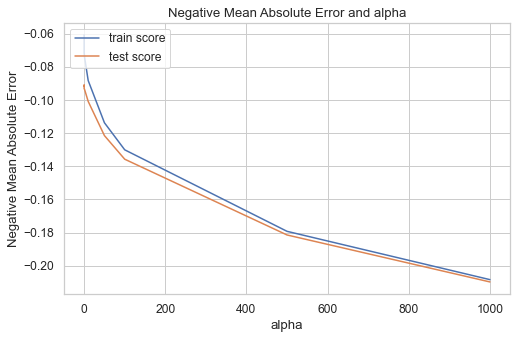

In [51]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

We se that alpha is somewhere between 0- 20 So sleting parameters according to that.

In [52]:
# list of alphas to tune
params = {'alpha': [0.001,0.01, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    2.1s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [53]:
cv_results = pd.DataFrame(model_cv.cv_results_)
#cv_results = cv_results[cv_results['param_alpha']<=20]
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.033551,0.052100,0.005189,0.001818,0.001,{'alpha': 0.001},-0.084348,-0.095529,-0.094133,-0.100388,-0.084095,-0.091699,0.006449,2,-0.060404,-0.060734,-0.059829,-0.061949,-0.060574,-0.060698,0.000696
1,0.014773,0.006906,0.006263,0.002630,0.01,{'alpha': 0.01},-0.083488,-0.095536,-0.095040,-0.097017,-0.083957,-0.091008,0.005985,1,-0.060978,-0.060775,-0.060378,-0.062447,-0.061281,-0.061172,0.000702
2,0.007254,0.000405,0.003543,0.000080,1,{'alpha': 1.0},-0.087668,-0.097798,-0.100943,-0.086812,-0.094837,-0.093612,0.005556,3,-0.076478,-0.067020,-0.071982,-0.077338,-0.077519,-0.074067,0.004061
3,0.009114,0.001461,0.004983,0.001619,2,{'alpha': 2.0},-0.087370,-0.099452,-0.101026,-0.087059,-0.096194,-0.094220,0.005930,4,-0.079661,-0.070729,-0.074540,-0.080233,-0.080347,-0.077102,0.003849
4,0.009902,0.000912,0.005598,0.000324,3,{'alpha': 3.0},-0.087613,-0.100657,-0.101963,-0.087554,-0.097039,-0.094965,0.006239,5,-0.081743,-0.073189,-0.076465,-0.082183,-0.082227,-0.079162,0.003691
5,0.011027,0.004873,0.004645,0.000907,4,{'alpha': 4.0},-0.088049,-0.101761,-0.103088,-0.088048,-0.097898,-0.095769,0.006530,6,-0.083353,-0.075192,-0.078045,-0.083747,-0.083764,-0.080820,0.003550
6,0.130082,0.244857,0.004617,0.000825,5,{'alpha': 5.0},-0.088388,-0.102814,-0.104207,-0.088808,-0.098764,-0.096596,0.006772,7,-0.084789,-0.076987,-0.079454,-0.085141,-0.085166,-0.082307,0.003430
7,0.009603,0.001337,0.005352,0.000582,6,{'alpha': 6.0},-0.088903,-0.103922,-0.105257,-0.089708,-0.099742,-0.097506,0.006943,8,-0.086083,-0.078610,-0.080726,-0.086400,-0.086449,-0.083654,0.003325
8,0.009508,0.000456,0.004519,0.000595,7,{'alpha': 7.0},-0.089509,-0.104994,-0.106208,-0.090704,-0.100754,-0.098434,0.007046,9,-0.087266,-0.080110,-0.081895,-0.087568,-0.087665,-0.084901,0.003235
9,0.010573,0.002596,0.006853,0.001404,8,{'alpha': 8.0},-0.090105,-0.105949,-0.107053,-0.091622,-0.101752,-0.099296,0.007125,10,-0.088401,-0.081489,-0.083025,-0.088675,-0.088871,-0.086092,0.003172


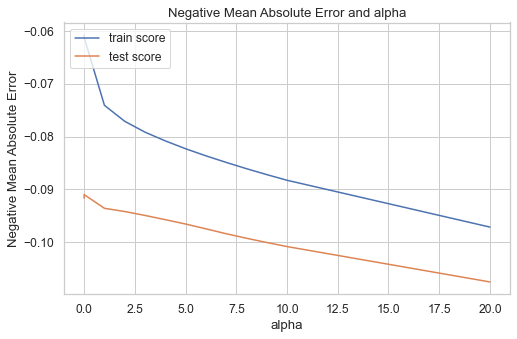

In [54]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

We see that the optimal alpha value is between 0-2

In [55]:
# Finding out the best score and Optimum value of alpha
print(model_cv.best_estimator_)
best_ridge_score = model_cv.best_score_
best_ridge_alpha = model_cv.best_params_["alpha"]

print(" The best r2 score is obtained at alpha {0}".format(best_ridge_alpha))

Ridge(alpha=0.01)
 The best r2 score is obtained at alpha 0.01


In [56]:
# Model building using optimal alpha
#ridge = Ridge(alpha=best_ridge_alpha)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

Ridge()

In [57]:
#creating coeffcients for the ridge regression
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = house_train.columns
cols.insert(0,'const')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter,(abs(ele) for ele in model_parameter))))
ridge_coef.columns = ['Features','Coefficient','Mod']

We are finding the absolute value of coefficient because negative coefficient is also as important as positive one and conveys that the vairbale is negatively related to the target variable Sale price ." For instance we just find the top 10 coefficents then 0.00 will be more important than a variable with -0.1 coefficent. but in relaility the variable with -0.1 is more important to predict saleprice rather than 0.0 because 0.0 shows that that variable can be excluded and is insignificant where as -0.1 shows that the variable is needed to predict the Sale price.

In [58]:
#selecting the top 10 variables
ridge_coef.sort_values(by='Mod',ascending=False).head(10)

,Features,Coefficient,Mod
0,LotFrontage,9.904322,9.904322
3,OverallCond,0.467599,0.467599
107,Condition2_RRAe,-0.457165,0.457165
17,BsmtFullBath,0.378840,0.378840
14,2ndFlrSF,0.347087,0.347087
133,Exterior1st_AsphShn,0.322791,0.322791
55,MSZoning_RL,0.233353,0.233353
56,MSZoning_RM,0.231787,0.231787
15,LowQualFinSF,0.223879,0.223879
54,MSZoning_RH,0.217621,0.217621


In [59]:
# Prediction using ridge regression
y_train_ridge_pred = ridge.predict(X_train)
print("Ridge regression train r2: ",round(metrics.r2_score(y_true=y_train, y_pred=y_train_ridge_pred),4))
y_test_ridge_pred = ridge.predict(X_test)
print("Ridge regression test r2: ",round(metrics.r2_score(y_true=y_test, y_pred=y_test_ridge_pred),4))

Ridge regression train r2:  0.9285
Ridge regression test r2:  0.8884


#### Lasso Regression Model

In [60]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 26 candidates, totalling 130 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:    3.4s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [61]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.106171,0.035983,0.004745,0.001192,0.0001,{'alpha': 0.0001},-0.080751,-0.093438,-0.093278,-0.087601,-0.079417,-0.086897,0.005962,1,-0.067187,-0.063582,-0.066503,-0.067474,-0.068911,-0.066732,0.001760
1,0.016176,0.002615,0.005858,0.001011,0.001,{'alpha': 0.001},-0.091303,-0.098316,-0.102860,-0.088307,-0.098976,-0.095952,0.005339,2,-0.090348,-0.078761,-0.085275,-0.089029,-0.090739,-0.086830,0.004473
2,0.015432,0.001553,0.008478,0.001298,0.01,{'alpha': 0.01},-0.136918,-0.151546,-0.148657,-0.133029,-0.155151,-0.145060,0.008578,3,-0.144732,-0.140296,-0.141596,-0.142535,-0.141826,-0.142197,0.001460
3,0.012776,0.002517,0.005979,0.000965,0.05,{'alpha': 0.05},-0.232153,-0.231147,-0.222007,-0.217063,-0.252368,-0.230947,0.012108,4,-0.229652,-0.228348,-0.232795,-0.231707,-0.228235,-0.230148,0.001821
4,0.014909,0.004741,0.009398,0.002626,0.1,{'alpha': 0.1},-0.305321,-0.307166,-0.301317,-0.287878,-0.321013,-0.304539,0.010648,5,-0.301426,-0.304240,-0.305939,-0.305780,-0.301850,-0.303847,0.001904


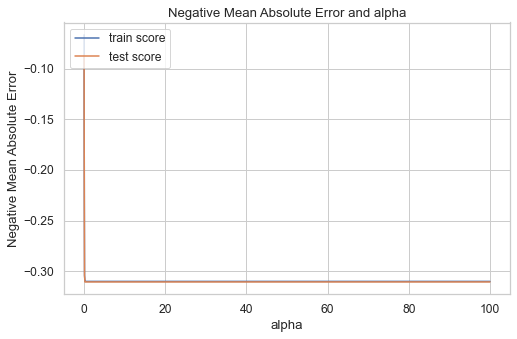

In [62]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

### Graph shows that Alpha value may be very colse to zero.

In [64]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.106171,0.035983,0.004745,0.001192,0.0001,{'alpha': 0.0001},-0.080751,-0.093438,-0.093278,-0.087601,-0.079417,-0.086897,0.005962,1,-0.067187,-0.063582,-0.066503,-0.067474,-0.068911,-0.066732,0.001760
1,0.016176,0.002615,0.005858,0.001011,0.001,{'alpha': 0.001},-0.091303,-0.098316,-0.102860,-0.088307,-0.098976,-0.095952,0.005339,2,-0.090348,-0.078761,-0.085275,-0.089029,-0.090739,-0.086830,0.004473
2,0.015432,0.001553,0.008478,0.001298,0.01,{'alpha': 0.01},-0.136918,-0.151546,-0.148657,-0.133029,-0.155151,-0.145060,0.008578,3,-0.144732,-0.140296,-0.141596,-0.142535,-0.141826,-0.142197,0.001460
3,0.012776,0.002517,0.005979,0.000965,0.05,{'alpha': 0.05},-0.232153,-0.231147,-0.222007,-0.217063,-0.252368,-0.230947,0.012108,4,-0.229652,-0.228348,-0.232795,-0.231707,-0.228235,-0.230148,0.001821
4,0.014909,0.004741,0.009398,0.002626,0.1,{'alpha': 0.1},-0.305321,-0.307166,-0.301317,-0.287878,-0.321013,-0.304539,0.010648,5,-0.301426,-0.304240,-0.305939,-0.305780,-0.301850,-0.303847,0.001904


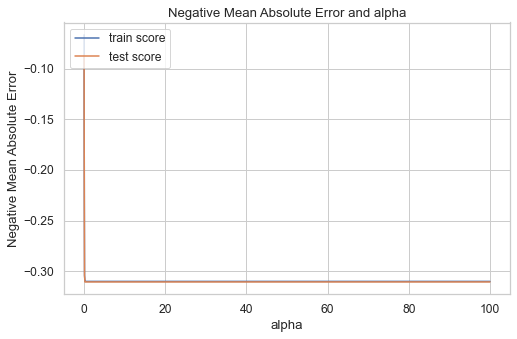

In [65]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [66]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.0001}

In [67]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    1.0s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [68]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.101956,0.037794,0.003970,0.000255,0.0001,{'alpha': 0.0001},-0.080751,-0.093438,-0.093278,-0.087601,-0.079417,-0.086897,0.005962,1,-0.067187,-0.063582,-0.066503,-0.067474,-0.068911,-0.066732,0.001760
1,0.016002,0.001024,0.005445,0.001970,0.001,{'alpha': 0.001},-0.091303,-0.098316,-0.102860,-0.088307,-0.098976,-0.095952,0.005339,2,-0.090348,-0.078761,-0.085275,-0.089029,-0.090739,-0.086830,0.004473
2,0.009876,0.000873,0.004038,0.000729,0.01,{'alpha': 0.01},-0.136918,-0.151546,-0.148657,-0.133029,-0.155151,-0.145060,0.008578,3,-0.144732,-0.140296,-0.141596,-0.142535,-0.141826,-0.142197,0.001460
3,0.007064,0.000633,0.006049,0.000618,0.05,{'alpha': 0.05},-0.232153,-0.231147,-0.222007,-0.217063,-0.252368,-0.230947,0.012108,4,-0.229652,-0.228348,-0.232795,-0.231707,-0.228235,-0.230148,0.001821
4,0.009099,0.000844,0.003952,0.000724,0.1,{'alpha': 0.1},-0.305321,-0.307166,-0.301317,-0.287878,-0.321013,-0.304539,0.010648,5,-0.301426,-0.304240,-0.305939,-0.305780,-0.301850,-0.303847,0.001904


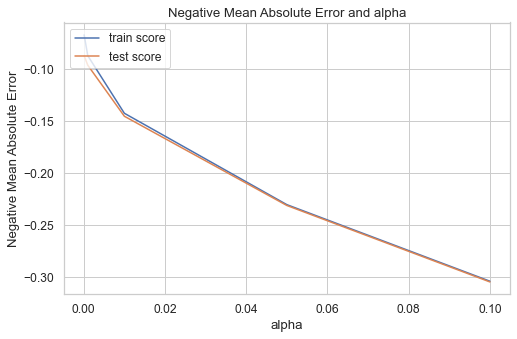

In [69]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [70]:
# list of alphas to tune
params = {'alpha': [0.00001,0.0001, 0.001, 0.01, 0.05]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    1.6s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.05]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [71]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.141676,0.017866,0.005602,0.002719,1e-05,{'alpha': 1e-05},-0.082947,-0.094900,-0.093776,-0.097927,-0.082181,-0.090346,0.006502,2,-0.060741,-0.060876,-0.060105,-0.062301,-0.060982,-0.061001,0.000718
1,0.111478,0.057146,0.004229,0.000739,0.0001,{'alpha': 0.0001},-0.080751,-0.093438,-0.093278,-0.087601,-0.079417,-0.086897,0.005962,1,-0.067187,-0.063582,-0.066503,-0.067474,-0.068911,-0.066732,0.001760
2,0.013536,0.002832,0.003546,0.000050,0.001,{'alpha': 0.001},-0.091303,-0.098316,-0.102860,-0.088307,-0.098976,-0.095952,0.005339,3,-0.090348,-0.078761,-0.085275,-0.089029,-0.090739,-0.086830,0.004473
3,0.007987,0.000385,0.003538,0.000074,0.01,{'alpha': 0.01},-0.136918,-0.151546,-0.148657,-0.133029,-0.155151,-0.145060,0.008578,4,-0.144732,-0.140296,-0.141596,-0.142535,-0.141826,-0.142197,0.001460
4,0.007020,0.000294,0.003791,0.000532,0.05,{'alpha': 0.05},-0.232153,-0.231147,-0.222007,-0.217063,-0.252368,-0.230947,0.012108,5,-0.229652,-0.228348,-0.232795,-0.231707,-0.228235,-0.230148,0.001821


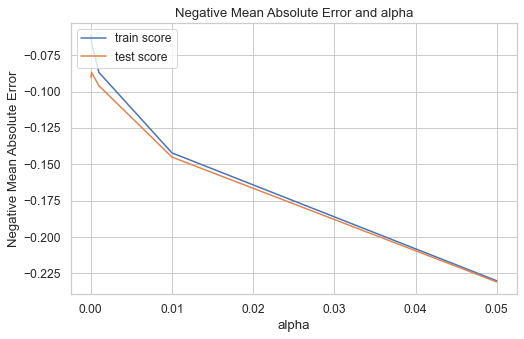

In [72]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [73]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.0001}

In [74]:
# list of alphas to tune
params = {'alpha': [0.00001,0.0001, 0.001]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    1.2s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [75]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.124506,0.019601,0.003645,0.000151,1e-05,{'alpha': 1e-05},-0.082947,-0.094900,-0.093776,-0.097927,-0.082181,-0.090346,0.006502,2,-0.060741,-0.060876,-0.060105,-0.062301,-0.060982,-0.061001,0.000718
1,0.085645,0.017285,0.003789,0.000189,0.0001,{'alpha': 0.0001},-0.080751,-0.093438,-0.093278,-0.087601,-0.079417,-0.086897,0.005962,1,-0.067187,-0.063582,-0.066503,-0.067474,-0.068911,-0.066732,0.001760
2,0.013010,0.000705,0.003790,0.000309,0.001,{'alpha': 0.001},-0.091303,-0.098316,-0.102860,-0.088307,-0.098976,-0.095952,0.005339,3,-0.090348,-0.078761,-0.085275,-0.089029,-0.090739,-0.086830,0.004473


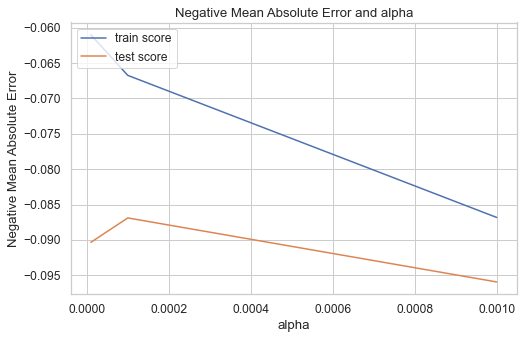

In [76]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [77]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.0001}

### Building optimum model with Lassso regression.

In [78]:
# After performing grid search we found the same alpha that ue use before
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print("Lasso Regression train r2:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Lasso Regression test r2:",r2_score(y_true=y_test,y_pred=y_test_pred))

Lasso Regression train r2: 0.9418708134902893
Lasso Regression test r2: 0.8798054507515116


In [80]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_test.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param,(abs(ele) for ele in model_param))))
lasso_coef.columns = ['Feature','Coef','mod']

We are finding the absolute value of coefficient because negative coefficient is also as important as positive one and conveys that the vairbale is negatively related to the target variable Sale price ." For instance we just find the top 10 coefficents then 0.00 will be more important than a variable with -0.1 coefficent. but in relaility the variable with -0.1 is more important to predict saleprice rather than 0.0 because 0.0 shows that that variable can be excluded and is insignificant where as -0.1 shows that the variable is needed to predict the Sale price.

In [81]:
lasso_coef

,Feature,Coef,mod
0,LotFrontage,9.016476,9.016476
1,LotArea,0.000000,0.000000
2,OverallQual,0.221623,0.221623
3,OverallCond,0.494970,0.494970
4,MasVnrArea,0.228028,0.228028
5,ExterCond,0.020673,0.020673
6,BsmtCond,-0.021565,0.021565
7,BsmtFinSF1,0.044209,0.044209
8,BsmtFinType2,0.278919,0.278919
9,BsmtFinSF2,0.000000,0.000000


In [82]:
#selecting the top 10 variables
lasso_coef.sort_values(by='mod',ascending=False).head(10)

,Feature,Coef,mod
0,LotFrontage,9.016476,9.016476
133,Exterior1st_AsphShn,1.284113,1.284113
107,Condition2_RRAe,-1.235881,1.235881
17,BsmtFullBath,1.174806,1.174806
127,RoofMatl_Membran,1.160288,1.160288
128,RoofMatl_Metal,1.114697,1.114697
131,RoofMatl_WdShake,1.110235,1.110235
130,RoofMatl_Tar&Grv,1.106411,1.106411
132,RoofMatl_WdShngl,1.060673,1.060673
129,RoofMatl_Roll,1.018627,1.018627


In [83]:
lasso.coef_

array([ 0.00000000e+00,  2.21623185e-01,  4.94969576e-01,  2.28027675e-01,
        2.06728087e-02, -2.15650853e-02,  4.42088413e-02,  2.78918815e-01,
        0.00000000e+00,  9.67035603e-03, -0.00000000e+00,  3.76598098e-01,
        6.49369731e-02,  7.05711823e-03,  0.00000000e+00, -3.68665068e-02,
        1.17480574e+00,  1.52510883e-01,  1.73054952e-02,  9.71598598e-02,
        5.15209820e-02,  0.00000000e+00, -1.44546951e-01,  6.83536251e-02,
        1.46727140e-01,  0.00000000e+00,  6.05992289e-02,  1.86170440e-02,
        2.70607536e-02,  2.17554690e-01,  7.23053374e-03,  1.26250760e-01,
        0.00000000e+00,  4.49252178e-02,  6.16119453e-02,  3.54008809e-02,
        1.72445508e-02,  5.15824401e-02, -8.79960451e-02, -1.04945948e-01,
       -1.49362744e-02, -1.26980872e-02, -0.00000000e+00, -2.03185596e-02,
        0.00000000e+00, -2.80213899e-03,  0.00000000e+00,  1.61081178e-02,
        6.16021202e-04, -4.31064181e-02, -8.65300690e-02, -0.00000000e+00,
       -4.87434443e-02,  

We will make use of Lasso Regression model because it is using less numbers of variables and giving almost the same accuract. Its more efficient model than Ridge regression model

In [84]:
# We have used lasso for building the modle as we got the optimal value of alpha.
lasso = Lasso(alpha = 0.0001)
lasso.fit(X_train,y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true = y_train,y_pred = y_train_pred))
print(r2_score(y_true = y_test,y_pred = y_test_pred))

0.9418708134902893
0.8798054507515116


The company wants to know:

Which variables are significant in predicting the price of a house:

LotFrontage : If the house Linear feet of street connected to property area increase then the Price increase.

BsmtFullBath : : If the BsmtFullBath area is more the SalePrice is higher

Overall Condition: If the Overall Condition is Excellent the SalePrice is higher

MSZoning_RH : If the house i near residential area then the SalePrice is higher

Overall quality: If the Overall Condition is Excellent the SalePrice is higher

Exterior1st_CBlock : IF the house Exterior1st is CBlock then price is less.

Garage Area: If the Garage area is high the SalePrice is higher

CentralAir: If the CentralAir is Yes the SalePrice is higher

How well those variables describe the price of a house.

These varibles tells about the linear relation with respect the price by which the company can improve ther sales. For instance they can concentrate in invseting properties wich may have high SalePrice in future

Optimal value of alpha:
For Ridge regression :1.0
For Lasso Regression :0.0001

Subjective Questions
Question 1: Double the alpha values and evaluate model

For Ridge regression aplha is 1.0 and now doubling it and making it 2.0



In [85]:
# Model building using optimal alpha
ridge_modified = Ridge(alpha=2.0)
ridge_modified.fit(X_train, y_train)

Ridge(alpha=2.0)

In [86]:
#creating coeffcients for the ridge regression
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = house_train.columns
cols.insert(0,'const')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter,(abs(ele) for ele in model_parameter))))
ridge_coef.columns = ['Features','Coefficient','Mod']
#selecting the top 10 variables
ridge_coef.sort_values(by='Mod',ascending=False).head(10)

,Features,Coefficient,Mod
0,LotFrontage,9.904322,9.904322
3,OverallCond,0.467599,0.467599
107,Condition2_RRAe,-0.457165,0.457165
17,BsmtFullBath,0.378840,0.378840
14,2ndFlrSF,0.347087,0.347087
133,Exterior1st_AsphShn,0.322791,0.322791
55,MSZoning_RL,0.233353,0.233353
56,MSZoning_RM,0.231787,0.231787
15,LowQualFinSF,0.223879,0.223879
54,MSZoning_RH,0.217621,0.217621


In [87]:
y_train_pred = ridge_modified.predict(X_train)
y_test_pred = ridge_modified.predict(X_test)

print("Ridge Regression train r2:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Ridge Regression test r2:",r2_score(y_true=y_test,y_pred=y_test_pred))

Ridge Regression train r2: 0.9227682571205075
Ridge Regression test r2: 0.8876880626433561


For Lasso regression alpha is 0.0001 and not doubling it and making it 0.0002

In [88]:
# Model building using optimal alpha
lasso_modified = Lasso(alpha=0.0002)
lasso_modified.fit(X_train, y_train)

Lasso(alpha=0.0002)

In [90]:
y_train_pred = lasso_modified.predict(X_train)
y_test_pred = lasso_modified.predict(X_test)

print("Lasso Regression train r2:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Lasso Regression test r2:",r2_score(y_true=y_test,y_pred=y_test_pred))

Lasso Regression train r2: 0.9258173595659208
Lasso Regression test r2: 0.8826870237591383


In [91]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param,(abs(ele) for ele in model_param))))
lasso_coef.columns = ['Feature','Coef','mod']

In [92]:
#selecting the top 10 variables
lasso_coef.sort_values(by='mod',ascending=False).head(10)

,Feature,Coef,mod
0,LotFrontage,9.016476,9.016476
133,Exterior1st_AsphShn,1.284113,1.284113
107,Condition2_RRAe,-1.235881,1.235881
17,BsmtFullBath,1.174806,1.174806
127,RoofMatl_Membran,1.160288,1.160288
128,RoofMatl_Metal,1.114697,1.114697
131,RoofMatl_WdShake,1.110235,1.110235
130,RoofMatl_Tar&Grv,1.106411,1.106411
132,RoofMatl_WdShngl,1.060673,1.060673
129,RoofMatl_Roll,1.018627,1.018627


Question 3: Double the alpha values and evaluate model

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

Drooping the first five important predictors

In [93]:
X_train_new = X_train.drop(['LotFrontage','BsmtFullBath','OverallCond','CentralAir','OverallQual'],axis=1)
X_test_new = X_test.drop(['LotFrontage','BsmtFullBath','OverallCond','CentralAir','OverallQual'],axis=1)

X_test_new.head()
X_train_new.shape

(1021, 192)

In [94]:
X_test_new.shape

(439, 192)

In [95]:
lasso_modified = Lasso()
param = {'alpha': [0.0001, 0.001, 0.01]}
folds = 5
# cross validation
lasso_cv_model_modified = GridSearchCV(estimator = lasso, 
                        param_grid = param, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv_model_modified.fit(X_train_new, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.8s finished


GridSearchCV(cv=5, estimator=Lasso(alpha=0.0001),
             param_grid={'alpha': [0.0001, 0.001, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [96]:
#Creating the results dataframe.
lasso_cv_modified_results = pd.DataFrame(lasso_cv_model_modified.cv_results_)
#reading the results
lasso_cv_modified_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.124299,0.040146,0.003841,0.000203,0.0001,{'alpha': 0.0001},-0.088757,-0.104996,-0.106434,-0.101431,-0.091613,-0.098647,0.007155,1,-0.073373,-0.070773,-0.072316,-0.073424,-0.076690,-0.073315,0.001942
1,0.012342,0.000643,0.003519,0.000082,0.001,{'alpha': 0.001},-0.098217,-0.106203,-0.115974,-0.106089,-0.109532,-0.107203,0.005750,2,-0.099216,-0.087073,-0.091852,-0.097445,-0.099857,-0.095089,0.004900
2,0.008512,0.001864,0.003733,0.000293,0.01,{'alpha': 0.01},-0.147796,-0.158518,-0.159587,-0.148918,-0.172864,-0.157537,0.009047,3,-0.156314,-0.156003,-0.152373,-0.153673,-0.154312,-0.154535,0.001469


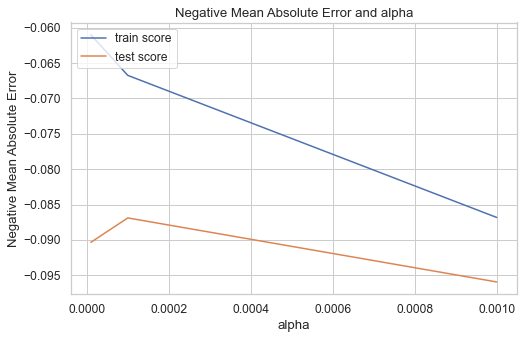

In [97]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [98]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.0001}

In [99]:
# After performing grid search we found the same alpha that ue use before
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train_new,y_train)

y_train_pred = lasso.predict(X_train_new)
y_test_pred = lasso.predict(X_test_new)

print("Lasso Regression train r2:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Lasso Regression test r2:",r2_score(y_true=y_test,y_pred=y_test_pred))

Lasso Regression train r2: 0.9318239440700781
Lasso Regression test r2: 0.856845632948287


In [101]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train_new.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param,(abs(ele) for ele in model_param))))
lasso_coef.columns = ['Feature','Coef','mod']

In [102]:
#selecting the top 5 variables
lasso_coef.sort_values(by='mod',ascending=False).head(5)

,Feature,Coef,mod
0,LotArea,8.898331,8.898331
128,Exterior1st_AsphShn,1.511451,1.511451
123,RoofMatl_Metal,1.463257,1.463257
122,RoofMatl_Membran,1.346694,1.346694
127,RoofMatl_WdShngl,1.326408,1.326408
